# Questões Teóricas

## Questão 1:
O que significa “pureza dos dados” em um nó de uma árvore de decisão? Por que ela é importante na construção da árvore?

R: Pureza dos dados significa o quão misturados os dados estão em certo nó da árvore, ou seja, quantas classes diferentes possuem os dados em um único nó. Quanto mais puros os dados estão, menos classes diferentes o nó possui. Afinal, queremos que, ao final da árvore, o modelo consiga categorizar todos os dados de entrada em suas respectivas classes, o que idealmente se traduz em nós finais com uma única classe, com grau de pureza máximo. A ideia por trás de uma árvore de decisão é um modelo de classificação em que dados misturados são organizados em classes através de uma série de "perguntas consecutivas", na forma de condições a serem cumpridas. Caso os dados cumprem os requisitos, seguem por uma rota de outras condições; caso contrário, são divididos e seguem por outra rota. Desta forma, após várias "iterações", o modelo consegue separar os dados em classes.

## Questão 2:
Suponha que uma árvore de decisão atinge 100% de acurácia no conjunto de treino, mas desempenho ruim no teste. O que pode estar acontecendo?

R: Provavelmente na hora de construir o modelo, criamos uma árvore com uma profundidade muito grande, na tentativa de englobar e classificar corretamente a totalidade dos dados de treino, levando a um overfitting. Este é um fenômeno bem comum em modelos de árvores de decisão, por isso é uma boa prática realizar uma poda dessa árvore antes de finalizarmos a construção do modelo, na tentativa de reduzir o overfitting e melhorar a capacidade de generalização.

## Questão 3:
Quais cuidados devem ser tomados no pré-processamento dos dados antes de treinar uma árvore de decisão? Comente sobre normalização, tratamento de variáveis categóricas e outliers.

R: Uma das principais vantagens de montar modelos de árvores de decisão é o fato destes modelos não precisarem de normalização de dados de entrada ou de tratamento de variáveis categóricas; ele consegue trabalhar com os dados na sua forma original. Outliers também não têm um impacto relevante no desempenho do modelo; no máximo, irá aumentar um pouco o grau de impureza de alguns nós.

## Questão 4:
Explique o que é pruning em árvores de decisão e por que ele é importante. Comente como o pruning pode afetar o equilíbrio entre a complexidade do modelo e sua capacidade de generalização.

R: Como já citado anteriormente, o pruning (ou poda) é uma forma de tentar reduzir o overfitting de modelos de árvores de decisão, reduzindo também sua complexidade e, consequentemente, melhorando sua capacidade de generalização. Ele pode ser feito antes da montagem do modelo (através da otimização dos hiperparâmetros; sendo o max_depth o mais importante), restringindo o crescimento desenfreado do modelo ou após a montagem inicial, através da utilização do hiperparâmetro ccp_alpha.

# Questões Práticas

### Questão 1:
Carregue o dataset do Titanic (o mesmo utilizado no último curso). Separe os dados em treino e teste (80/20) e selecione variáveis relevantes para prever a coluna Survived.

In [324]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [325]:
#criando uma coluna para dizer se há número de cabine disponível
df['has_cabin'] = [0 if pd.isna(x) else 1 for x in df['Cabin']]
df.drop(columns=['Cabin'], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0


In [326]:
#checando por entradas NaN
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [327]:
#preenchendo os NaN
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [328]:
#convertendo as variáveis categóricas já que o modelo do scikit não funciona com dados categóricos
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [329]:
#dividindo em treino e teste
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived', 'Name', 'Ticket'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Questão 2:
Treine uma árvore de decisão com os dados selecionados e visualize sua estrutura usando plot_tree. Escolha dois nós da árvore e explique, em linguagem natural, o que cada um deles representa (ex: “passageiros com idade abaixo de 10 anos e na 3ª classe tendem a não sobreviver”).

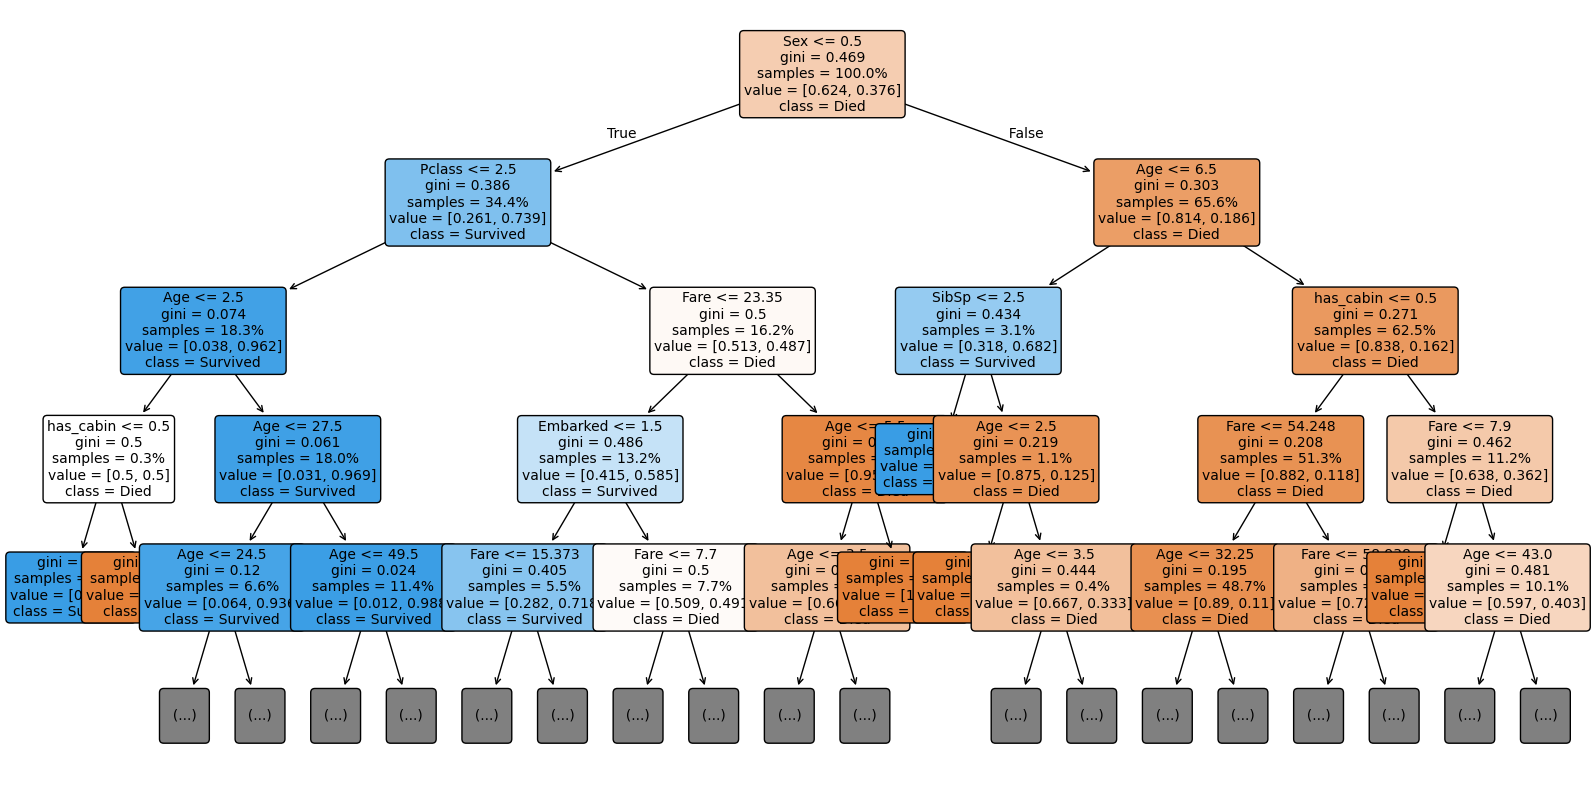

In [330]:
from sklearn import tree
import matplotlib.pyplot as plt

#criando um modelo padrão qualquer
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X_train.columns,
    class_names=['Died', 'Survived'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=4,
)
plt.show()

R:


*   Passageiros masculinos morreram, na maior parte das vezes (80/20)
*   Enquanto isso, passageiras femininas tiveram sua maior chance de sobrevivência se eram das classes 1 e 2 (10/90)



### Questão 3:
Avalie o desempenho da árvore de decisão no conjunto de teste usando acurácia.

In [331]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
acc_treino = accuracy_score(y_train, clf.predict(X_train))
acc_teste = accuracy_score(y_test, y_pred)
print(f'Acurácia treino: {(acc_treino*100):.2f}%')
print(f'Acurácia real: {(accuracy_score(y_test, y_pred)*100):.2f}%')

Acurácia treino: 98.31%
Acurácia real: 78.77%


R: Bom, o modelo inicial sem ajuste de hiperparâmetros possui uma acurácia quase que randômica. E o overfitting também está aparente.
(baseando-se no modelo padrão com os seguintes parâmetros: criterion = Gini, splitter = best, max_depth = None, min_samples_split = 2, min_samples_leaf = 1)

## Questão 4:
Ajuste os parâmetros max_depth, min_samples_split e min_samples_leaf. Como esses parâmetros afetam a performance da árvore no teste? Há sinais de overfitting / underfitting?

In [332]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia treino: {acc_train * 100:.3f}%')
print(f'Acurácia real: {accuracy_test * 100:.3f}%')

Acurácia treino: 83.427%
Acurácia real: 79.888%


R: O *max_depth* é um dos parâmetros principais para limitar a complexidade da árvore, e, assim, reduzir o risco de overfitting, pois limita a profundidade do modelo (o número de "camadas"). *min_samples_split* controla o número mínimo de amostras que um nó deve ter para se dividir novamente. Dessa forma, valores maiores impedem divisões precoces e a criação de novos ramos da árvore, reduzindo a complexidade do modelo. Já *min_samples_leaf* controla o número mínimo de amostras que uma folha (nó final) precisa possuir, o que impede a criação de folhas com amostras únicas, diminuindo a sensibilidade do modelo a ruídos e outliers.
Como esperado, este modelo com hiperparâmetros ajustados não tem indícios de over ou underfitting.

## Questão 5:
Altere o critério de divisão da árvore de decisão de gini para entropy. Treine novamente o modelo e compare o desempenho no conjunto de teste. Houve diferença significativa? Comente.

In [333]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia treino: {acc_train * 100:.3f}%')
print(f'Acurácia real: {accuracy_test * 100:.3f}%')

Acurácia treino: 82.444%
Acurácia real: 79.888%


R: Não houve diferença significativa na acurácia do modelo que utilizou o índice de Gini para o modelo que utilizou Entropia (79.888% vs 79.888%). Isso significa que são critérios que utilizam a mesma lógica: medem o grau de mistura/incerteza entre os dados de cada nó. Ainda que as fórmulas sejam diferentes entre si, o raciocínio que levou à criação de cada critério foi basicamente o mesmo.

## Questão 6:
Compare a acurácia de uma árvore de decisão com a de um KNN (k=5) e de uma regressão logística. Qual modelo obteve melhor desempenho no conjunto de teste? Algum deles parece sofrer mais com overfitting ou underfitting?

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
accuracy_test_clf = accuracy_score(y_test, y_pred_clf)
acc_train_clf = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia treino AD: {acc_train_clf * 100:.3f}%')
print(f'Acurácia real AD: {accuracy_test_clf * 100:.3f}%')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)
acc_train_knn = accuracy_score(y_train, knn.predict(X_train_scaled))
print(f'\nAcurácia treino KNN: {acc_train_knn * 100:.3f}%')
print(f'Acurácia real KNN: {accuracy_test_knn * 100:.3f}%')

logreg = LogisticRegression(max_iter=3000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_test_logreg = accuracy_score(y_test, y_pred_logreg)
acc_train_logreg = accuracy_score(y_train, logreg.predict(X_train_scaled))
print(f'\nAcurácia treino RL: {acc_train_logreg * 100:.3f}%')
print(f'Acurácia real RL: {accuracy_test_logreg * 100:.3f}%')
#meus modelos de regressão logística sempre ficam com acurácia melhor no conjunto de teste, vai entender

Acurácia treino AD: 83.427%
Acurácia real AD: 79.888%

Acurácia treino KNN: 86.798%
Acurácia real KNN: 80.447%

Acurácia treino RL: 79.775%
Acurácia real RL: 82.123%


R: O modelo com melhor desempenho no conjunto de teste foi o modelo de regressão logística, embora tenha sido um desempenho melhor até do que no próprio conjunto de treino (data leakage?). O modelo do KNN teve a maior diferença entre o desempenho de treino e teste (6,3%), o que pode indicar um possível grau de overfitting, pois sua generalização não foi das melhores.

## Questão 7:
Ajuste o parâmetro ccp_alpha da árvore de decisão usando validação cruzada (5-fold). Escolha um valor adequado de ccp_alpha para podar a árvore. Treine a árvore podada e avalie seu desempenho no conjunto de teste.

In [338]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd

ccp_alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for alpha in ccp_alphas:
    fold_accuracies = []

    for train_index, val_index in kfold.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        dt = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
        dt.fit(X_train_fold, y_train_fold)

        y_proba_fold = dt.predict_proba(X_val_fold)[:, 1]
        y_pred_fold = dt.predict(X_val_fold)

        fold_accuracies.append(accuracy_score(y_val_fold, y_pred_fold))

    def format_metric(mean):
        return f"{mean*100:.3f}%"

    accuracy_str = format_metric(np.mean(fold_accuracies))

    results.append({
        'alpha': alpha,
        'Acurácia Média': accuracy_str,
        'Desvio Padrão': np.std(fold_accuracies)
    })

df_results = pd.DataFrame(results)
df_results = df_results[['alpha', 'Acurácia Média','Desvio Padrão']]
df_results

,alpha,Acurácia Média,Desvio Padrão
0,0.000,76.122%,0.010191
1,0.001,76.123%,0.012580
2,0.010,81.180%,0.022764
3,0.100,78.792%,0.027047
4,1.000,62.360%,0.002758
5,10.000,62.360%,0.002758
6,100.000,62.360%,0.002758


In [339]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia treino: {acc_train * 100:.3f}%')
print(f'Acurácia real: {accuracy_test * 100:.3f}%')

Acurácia treino: 83.427%
Acurácia real: 79.888%


R: Tivemos um ganho na acurácia após o ajuste do modelo para o ccp_alpha ótimo (0,01), embora esse valor também nos dê um desvio padrão ligeiramente maior.

## Questão 8:

Compare o desempenho da árvore sem pruning (original) e da árvore podada (com ccp_alpha ajustado). A árvore podada apresenta desempenho mais estável entre os folds da validação cruzada? Comente os resultados observados.

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ccp_alphas = [0, 0.01]

results = []

for alpha in ccp_alphas:
    fold_accuracies = []

    for train_index, val_index in kfold.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        dt = DecisionTreeClassifier(
            ccp_alpha=alpha,
            random_state=42
        )
        dt.fit(X_train_fold, y_train_fold)

        y_pred_fold = dt.predict(X_val_fold)

        fold_accuracies.append(accuracy_score(y_val_fold, y_pred_fold))

    results.append({
        'Modelo': f"Árvore (α={alpha})",
        'Acurácia': f"{np.mean(fold_accuracies):.3f} ± {np.std(fold_accuracies):.3f}",
        'Acurácia (folds)': [f'{accuracy*100:.3f}%' for accuracy in fold_accuracies]
    })

df_results = pd.DataFrame(results)
df_results = df_results[['Modelo', 'Acurácia', 'Acurácia (folds)']]
df_results.sort_values(by='Modelo', ascending=True)

,Modelo,Acurácia,Acurácia (folds)
0,Árvore (α=0),0.761 ± 0.010,"[75.524%, 77.622%, 76.056%, 74.648%, 76.761%]"
1,Árvore (α=0.01),0.812 ± 0.023,"[78.322%, 83.916%, 83.803%, 79.577%, 80.282%]"


R: A árvore podada possui um desvio padrão ligeiramente maior entre os folds (~0,13), o que significa que é um pouco menos consistente do que a árvore original. Entretanto, obtemos uma acurácia melhor em todos os folds da árvore podada quando comparadas com as métricas da árvore original (em média, um ganho de 5%).